In [198]:
#imports 
from pyforest import *
lazy_imports()

['from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import matplotlib as mpl',
 'from scipy import signal as sg',
 'from sklearn.ensemble import RandomForestClassifier',
 'import textblob',
 'import os',
 'import dash',
 'from sklearn.linear_model import LassoCV',
 'import lightgbm as lgb',
 'from sklearn.model_selection import GridSearchCV',
 'import keras',
 'import pydot',
 'from sklearn.preprocessing import MinMaxScaler',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import sklearn',
 'from sklearn.linear_model import Lasso',
 'import spacy',
 'import skimage',
 'from openpyxl import load_workbook',
 'import gensim',
 'import imutils',
 'from sklearn.linear_model import ElasticNetCV',
 'import re',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.model_selection import KFold',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'import torch',
 'import tqdm',
 'from sklea

In [199]:
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [200]:
from chart_studio.plotly import plot,iplot
import cufflinks as cf

In [201]:
# loading airline dataset
df = pd.read_csv("dataset/FDA.csv",header = 0,date_parser = [0,5])
df.head()

<IPython.core.display.Javascript object>

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,PNR_NUMSER,CREATION_DATE_TIME,PNR_STATUS,PAX_STATUS,SEGMENT_STATUS,PNR_TYPE,...,OSI_KEYWORD,MANIFEST_COMMENT,PROMO_CODE,LAST_MODIFIED_DATE,TICKET_NUMBER,COUPON_NUMBER,ZIP_CODE,SURCHARGE_AMOUNT,AGENCY_NAME,CORPORATE_NAME
0,9/24/2020,FL134,OJK,ZSF,A2282Z,4/7/2020 21:46,ACTIVE,ACTIVE,CONFIRMED,NORMAL,...,NaN,WATANABE HARUKA INFANT 04-03-2019,NaN,4/8/2020 21:47,1.010000e+12,1.0,123456,NaN,NaN,NaN
1,5/22/2020,FL134,OJK,ZSF,A22P4H,2/12/2020 23:09,CANCELLED,ACTIVE,CANCELLED,NORMAL,...,NaN,NaN,NaN,4/28/2020 11:21,NaN,NaN,123456,NaN,NaN,NaN
2,5/21/2020,FL133,ZSF,OJK,A8XV2C,1/24/2020 16:17,CANCELLED,ACTIVE,CANCELLED,GROUP,...,NaN,NaN,NaN,4/13/2020 13:27,NaN,NaN,123456,NaN,NaN,NaN
3,8/16/2020,FL134,OJK,ZSF,A22Q2Q,3/12/2020 7:57,CANCELLED,ACTIVE,CANCELLED,NORMAL,...,NaN,NaN,NaN,3/15/2020 2:02,NaN,NaN,123456,NaN,NaN,NaN
4,6/21/2020,FL141,ZSF,KUF,A22Q2T,3/13/2020 19:51,CANCELLED,ACTIVE,CANCELLED,NORMAL,...,NaN,NaN,NaN,4/6/2020 17:19,NaN,NaN,123456,NaN,NaN,NaN


In [202]:
#filtering columns
df = df.loc[:,df.columns.isin(['FLIGHT_DATE','FLIGHT_NUMBER','BOARD_POINT','OFF_POINT','PNR_NUMSER','CREATION_DATE_TIME',
                           'FARE_LEVEL_CODE','FARE_BASIS','PNR_STATUS','PNR_TYPE','FARE_AMOUNT'])]
df.head()

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,PNR_NUMSER,CREATION_DATE_TIME,PNR_STATUS,PNR_TYPE,FARE_LEVEL_CODE,FARE_BASIS,FARE_AMOUNT
0,9/24/2020,FL134,OJK,ZSF,A2282Z,4/7/2020 21:46,ACTIVE,NORMAL,BD,BDS,11500
1,5/22/2020,FL134,OJK,ZSF,A22P4H,2/12/2020 23:09,CANCELLED,NORMAL,WO,WO45S,0
2,5/21/2020,FL133,ZSF,OJK,A8XV2C,1/24/2020 16:17,CANCELLED,GROUP,GR,BGPSO,0
3,8/16/2020,FL134,OJK,ZSF,A22Q2Q,3/12/2020 7:57,CANCELLED,NORMAL,WO,EHCSC,0
4,6/21/2020,FL141,ZSF,KUF,A22Q2T,3/13/2020 19:51,CANCELLED,NORMAL,BD,BD140S,0


In [203]:
# transforming creation and booking date to datetime
df['FLIGHT_DATE'] = pd.to_datetime(df['FLIGHT_DATE'])
df['CREATION_DATE_TIME'] = pd.to_datetime(df['CREATION_DATE_TIME'])
df.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,PNR_NUMSER,CREATION_DATE_TIME,PNR_STATUS,PNR_TYPE,FARE_LEVEL_CODE,FARE_BASIS,FARE_AMOUNT
0,2020-09-24,FL134,OJK,ZSF,A2282Z,2020-04-07 21:46:00,ACTIVE,NORMAL,BD,BDS,11500
1,2020-05-22,FL134,OJK,ZSF,A22P4H,2020-02-12 23:09:00,CANCELLED,NORMAL,WO,WO45S,0
2,2020-05-21,FL133,ZSF,OJK,A8XV2C,2020-01-24 16:17:00,CANCELLED,GROUP,GR,BGPSO,0
3,2020-08-16,FL134,OJK,ZSF,A22Q2Q,2020-03-12 07:57:00,CANCELLED,NORMAL,WO,EHCSC,0
4,2020-06-21,FL141,ZSF,KUF,A22Q2T,2020-03-13 19:51:00,CANCELLED,NORMAL,BD,BD140S,0


In [204]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18007 entries, 0 to 18006
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FLIGHT_DATE         18007 non-null  datetime64[ns]
 1   FLIGHT_NUMBER       18007 non-null  object        
 2   BOARD_POINT         18007 non-null  object        
 3   OFF_POINT           18007 non-null  object        
 4   PNR_NUMSER          18007 non-null  object        
 5   CREATION_DATE_TIME  18007 non-null  datetime64[ns]
 6   PNR_STATUS          18007 non-null  object        
 7   PNR_TYPE            18007 non-null  object        
 8   FARE_LEVEL_CODE     18007 non-null  object        
 9   FARE_BASIS          18007 non-null  object        
 10  FARE_AMOUNT         18007 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 1.5+ MB


In [205]:
# describe
df.describe()

,FARE_AMOUNT
count,18007.000000
mean,1784.307214
std,5334.159140
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,33500.000000


<IPython.core.display.Javascript object>

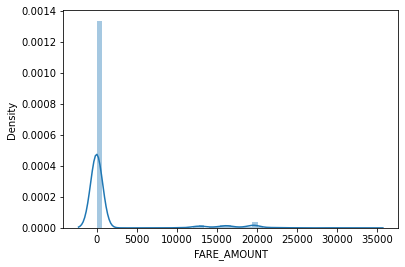

In [206]:
# distplot fare price
sns.distplot(df.FARE_AMOUNT)

<IPython.core.display.Javascript object>

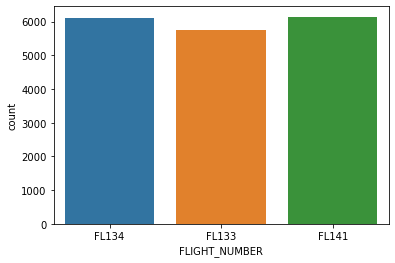

In [207]:
# frequency of flight 
sns.countplot(df.FLIGHT_NUMBER)

In [208]:
# period of data 
print(min(df.FLIGHT_DATE),' - ',max(df.FLIGHT_DATE))
print(min(df.CREATION_DATE_TIME),' - ',max(df.CREATION_DATE_TIME))

2020-05-21 00:00:00  -  2020-09-27 00:00:00
2020-01-21 10:04:00  -  2020-05-20 21:04:00


In [209]:
# grouping and aggregating TOTAL BOOKING
grouped_df1 = df.groupby(['FLIGHT_DATE','FLIGHT_NUMBER','BOARD_POINT','OFF_POINT','CREATION_DATE_TIME','FARE_LEVEL_CODE',
                        'FARE_BASIS']).agg(TOTAL_BOOKING = pd.NamedAgg(
                         column = 'PNR_NUMSER',aggfunc = 'count')).reset_index()
grouped_df1.head(30)

<IPython.core.display.Javascript object>

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING
0,2020-05-21,FL133,ZSF,OJK,2020-01-24 16:17:00,GR,BGPSO,6
1,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2
2,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1
3,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1
4,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2
5,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1
6,2020-05-21,FL133,ZSF,OJK,2020-04-04 17:05:00,BD,BDS,1
7,2020-05-21,FL133,ZSF,OJK,2020-04-13 09:10:00,WO,EHDS,1
8,2020-05-21,FL133,ZSF,OJK,2020-04-16 17:51:00,GR,SALESTOP,100
9,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:03:00,WO,WO45S,3


In [210]:
#distinct count fare class and fare basis
grouped_df1['FARE_LEVEL_CODE'].value_counts()

WO    1164
GR     332
BD     122
RY      83
CD      35
IT      30
CR       4
BT       2
CA       2
KC       1
TD       1
UH       1
CW       1
Name: FARE_LEVEL_CODE, dtype: int64

<IPython.core.display.Javascript object>

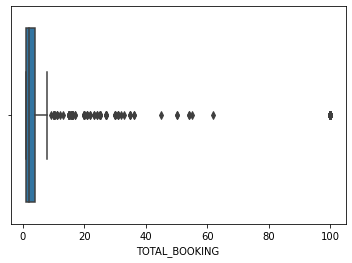

In [211]:
# net booking analysis
sns.boxplot(grouped_df1['TOTAL_BOOKING'])

In [212]:
grouped_df1.describe()

,TOTAL_BOOKING
count,1778.000000
mean,10.127672
std,25.138133
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,100.000000


<IPython.core.display.Javascript object>

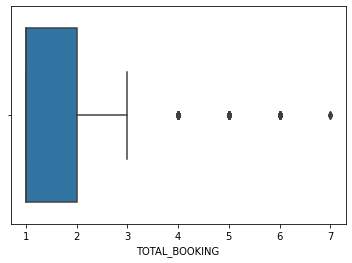

In [213]:
sns.boxplot(grouped_df1.loc[grouped_df1['FARE_LEVEL_CODE'] != 'GR']['TOTAL_BOOKING'])

In [214]:
grouped_df1.loc[grouped_df1['FARE_LEVEL_CODE'] != 'GR'].describe()

,TOTAL_BOOKING
count,1446.000000
mean,1.796680
std,1.189407
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,7.000000


In [215]:
# removing group booking from data 
grouped_df1 = grouped_df1.loc[grouped_df1['FARE_LEVEL_CODE'] != 'GR']
grouped_df1.head(30)

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING
1,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2
2,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1
3,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1
4,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2
5,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1
6,2020-05-21,FL133,ZSF,OJK,2020-04-04 17:05:00,BD,BDS,1
7,2020-05-21,FL133,ZSF,OJK,2020-04-13 09:10:00,WO,EHDS,1
9,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:03:00,WO,WO45S,3
10,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:11:00,CD,HCDSF,5
11,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:43:00,WO,WO45S,1


In [216]:
# grouping and aggregating CANCELLED
grouped_df2 = df.loc[df['PNR_STATUS'] == 'CANCELLED'].groupby(['FLIGHT_DATE','FLIGHT_NUMBER','BOARD_POINT',
                                                                'OFF_POINT','CREATION_DATE_TIME','FARE_LEVEL_CODE',
                                                                'FARE_BASIS']).agg(TOTAL_CANCELLED = pd.NamedAgg(
                                                                column = 'PNR_NUMSER',aggfunc = 'count')).reset_index()
grouped_df2.head(30)

<IPython.core.display.Javascript object>

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_CANCELLED
0,2020-05-21,FL133,ZSF,OJK,2020-01-24 16:17:00,GR,BGPSO,6
1,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2
2,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1
3,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1
4,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2
5,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1
6,2020-05-21,FL133,ZSF,OJK,2020-04-04 17:05:00,BD,BDS,1
7,2020-05-21,FL133,ZSF,OJK,2020-04-13 09:10:00,WO,EHDS,1
8,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:03:00,WO,WO45S,3
9,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:11:00,CD,HCDSF,5


In [217]:
# removing GR from cancelled data
grouped_df2 = grouped_df2.loc[grouped_df2['FARE_LEVEL_CODE'] != 'GR']
grouped_df2.describe()

,TOTAL_CANCELLED
count,856.000000
mean,1.699766
std,1.114414
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [218]:
# merge 
df2 = grouped_df1.merge(grouped_df2, on = ['FLIGHT_DATE','FLIGHT_NUMBER','BOARD_POINT',
                                                                'OFF_POINT','CREATION_DATE_TIME','FARE_LEVEL_CODE',
                                                                'FARE_BASIS'], how = 'outer' )
df2.head(30)

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING,TOTAL_CANCELLED
0,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2,2.0
1,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1,1.0
2,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1,1.0
3,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2,2.0
4,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1,1.0
5,2020-05-21,FL133,ZSF,OJK,2020-04-04 17:05:00,BD,BDS,1,1.0
6,2020-05-21,FL133,ZSF,OJK,2020-04-13 09:10:00,WO,EHDS,1,1.0
7,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:03:00,WO,WO45S,3,3.0
8,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:11:00,CD,HCDSF,5,5.0
9,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:43:00,WO,WO45S,1,1.0


In [219]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1445
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FLIGHT_DATE         1446 non-null   datetime64[ns]
 1   FLIGHT_NUMBER       1446 non-null   object        
 2   BOARD_POINT         1446 non-null   object        
 3   OFF_POINT           1446 non-null   object        
 4   CREATION_DATE_TIME  1446 non-null   datetime64[ns]
 5   FARE_LEVEL_CODE     1446 non-null   object        
 6   FARE_BASIS          1446 non-null   object        
 7   TOTAL_BOOKING       1446 non-null   int64         
 8   TOTAL_CANCELLED     856 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 113.0+ KB


In [220]:
# replacing na values in cancallation 
df2['TOTAL_CANCELLED'].fillna(0,inplace = True)

In [221]:
# net booking
df2['NET_BOOKING'] = df2['TOTAL_BOOKING'] - df2['TOTAL_CANCELLED']
df2.head(30)

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING,TOTAL_CANCELLED,NET_BOOKING
0,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2,2.0,0.0
1,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1,1.0,0.0
2,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1,1.0,0.0
3,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2,2.0,0.0
4,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1,1.0,0.0
5,2020-05-21,FL133,ZSF,OJK,2020-04-04 17:05:00,BD,BDS,1,1.0,0.0
6,2020-05-21,FL133,ZSF,OJK,2020-04-13 09:10:00,WO,EHDS,1,1.0,0.0
7,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:03:00,WO,WO45S,3,3.0,0.0
8,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:11:00,CD,HCDSF,5,5.0,0.0
9,2020-05-21,FL134,OJK,ZSF,2020-01-28 09:43:00,WO,WO45S,1,1.0,0.0


In [222]:
# days to departure 
df2['DAYS_GAP'] = df2['FLIGHT_DATE'] - df2['CREATION_DATE_TIME']
df2['DAYS_GAP'] = df2['DAYS_GAP'].astype('timedelta64[D]')
df2.head()

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING,TOTAL_CANCELLED,NET_BOOKING,DAYS_GAP
0,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2,2.0,0.0,96.0
1,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1,1.0,0.0,88.0
2,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1,1.0,0.0,87.0
3,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2,2.0,0.0,81.0
4,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1,1.0,0.0,76.0


In [223]:
#date transformation
df2['FLIGHT_DAY_OF_WEEK'] = df2['FLIGHT_DATE'].dt.weekday
df2['FLIGHT_MONTH'] = df2['FLIGHT_DATE'].dt.month
df2['FLIGHT_YEAR'] = df2['FLIGHT_DATE'].dt.year
df2['BOOKING_DAY_OF_WEEK'] = df2['CREATION_DATE_TIME'].dt.weekday
df2['BOOKING_MONTH'] = df2['CREATION_DATE_TIME'].dt.month
df2['BOOKING_YEAR'] = df2['CREATION_DATE_TIME'].dt.year
df2.head()

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING,TOTAL_CANCELLED,NET_BOOKING,DAYS_GAP,FLIGHT_DAY_OF_WEEK,FLIGHT_MONTH,FLIGHT_YEAR,BOOKING_DAY_OF_WEEK,BOOKING_MONTH,BOOKING_YEAR
0,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2,2.0,0.0,96.0,3,5,2020,4,2,2020
1,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1,1.0,0.0,88.0,3,5,2020,5,2,2020
2,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1,1.0,0.0,87.0,3,5,2020,6,2,2020
3,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2,2.0,0.0,81.0,3,5,2020,5,2,2020
4,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1,1.0,0.0,76.0,3,5,2020,3,3,2020


In [224]:
# describe df2
df2.describe()

,TOTAL_BOOKING,TOTAL_CANCELLED,NET_BOOKING,DAYS_GAP,FLIGHT_DAY_OF_WEEK,FLIGHT_MONTH,FLIGHT_YEAR,BOOKING_DAY_OF_WEEK,BOOKING_MONTH,BOOKING_YEAR
count,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.0,1446.000000,1446.000000,1446.0
mean,1.796680,1.006224,0.790456,135.033887,3.516598,7.047718,2020.0,2.486860,2.557400,2020.0
std,1.189407,1.197155,1.248254,49.572926,1.955757,1.219708,0.0,1.934793,1.286807,0.0
min,1.000000,0.000000,0.000000,21.000000,0.000000,5.000000,2020.0,0.000000,1.000000,2020.0
25%,1.000000,0.000000,0.000000,97.000000,2.000000,6.000000,2020.0,1.000000,2.000000,2020.0
50%,1.000000,1.000000,0.000000,132.000000,4.000000,7.000000,2020.0,2.000000,2.000000,2020.0
75%,2.000000,1.000000,1.000000,178.000000,5.000000,8.000000,2020.0,4.000000,3.000000,2020.0
max,7.000000,6.000000,7.000000,241.000000,6.000000,9.000000,2020.0,6.000000,5.000000,2020.0


In [225]:
# farebasis analysis
for code in df2['FARE_LEVEL_CODE'].value_counts().index:
    print(" ")
    print("FARE_LEVEL_CODE : ", code )
    print(" ")
    print(df2.loc[df2['FARE_LEVEL_CODE'] == code]['FARE_BASIS'].value_counts())

 
FARE_LEVEL_CODE :  WO
 
WO45S       726
EHDS         66
EHASC        64
EHA177C      49
EHDSC        39
EHCSC        39
EHCS         31
WO45157S     29
WO45147S     27
EHBS         19
EHBSC        18
EHA197S       8
EHD152S       7
WO4595S       6
EHB172C       4
EHC177S       4
EHC167C       4
EHB145S       4
WO45SC        4
WO45162S      3
WO45152S      2
EHD167S       1
EHB187S       1
EHC182S       1
EHD160S       1
WO45137S      1
EHD155S       1
EHAS          1
EHD150S       1
EHC162S       1
EHB177C       1
EHA185S       1
Name: FARE_BASIS, dtype: int64
 
FARE_LEVEL_CODE :  BD
 
BDS       116
BD140S      6
Name: FARE_BASIS, dtype: int64
 
FARE_LEVEL_CODE :  RY
 
TYPECSC     71
TYPEC217     4
TYPEC187     3
YFXSC        2
YOW325S      1
TYPEC177     1
TYPEBSC      1
Name: FARE_BASIS, dtype: int64
 
FARE_LEVEL_CODE :  CD
 
HCDSF    35
Name: FARE_BASIS, dtype: int64
 
FARE_LEVEL_CODE :  IT
 
HITSF2    30
Name: FARE_BASIS, dtype: int64
 
FARE_LEVEL_CODE :  CR
 
HCRSF3    4
Name: F

In [226]:
# convert CR,BT ,CW,CA,UH,TD,KC as others
df2['FARE_LEVEL_CODE'] = df2['FARE_LEVEL_CODE'].replace({'CR':'Others','BT':'Others',
                                                    'CW':'Others','CA':'Others',
                                                    'UH':'Others','TD':'Others',
                                                    'KC':'Others'})
df2['FARE_LEVEL_CODE'].value_counts()

WO        1164
BD         122
RY          83
CD          35
IT          30
Others      12
Name: FARE_LEVEL_CODE, dtype: int64

In [227]:
# distinct origin and destination
print(df2['BOARD_POINT'].value_counts())
print(df2['OFF_POINT'].value_counts())

ZSF    946
OJK    500
Name: BOARD_POINT, dtype: int64
OJK    513
ZSF    500
KUF    433
Name: OFF_POINT, dtype: int64


<IPython.core.display.Javascript object>

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING,TOTAL_CANCELLED,NET_BOOKING,DAYS_GAP,FLIGHT_DAY_OF_WEEK,FLIGHT_MONTH,FLIGHT_YEAR,BOOKING_DAY_OF_WEEK,BOOKING_MONTH,BOOKING_YEAR
198,2020-05-31,FL134,OJK,ZSF,2020-02-06 21:09:00,BD,BDS,1,0.0,1.0,114.0,6,5,2020,3,2,2020
215,2020-06-01,FL134,OJK,ZSF,2020-03-19 22:17:00,WO,EHDS,1,0.0,1.0,73.0,0,6,2020,3,3,2020
216,2020-06-01,FL134,OJK,ZSF,2020-04-25 07:49:00,BD,BDS,1,0.0,1.0,36.0,0,6,2020,5,4,2020
233,2020-06-03,FL134,OJK,ZSF,2020-05-10 21:19:00,WO,EHDS,1,0.0,1.0,23.0,2,6,2020,6,5,2020
249,2020-06-05,FL134,OJK,ZSF,2020-05-06 00:26:00,RY,YFXSC,1,0.0,1.0,29.0,4,6,2020,2,5,2020
264,2020-06-06,FL134,OJK,ZSF,2020-04-22 09:28:00,WO,WO45S,2,0.0,2.0,44.0,5,6,2020,2,4,2020
264,2020-06-06,FL134,OJK,ZSF,2020-04-22 09:28:00,WO,WO45S,2,0.0,2.0,44.0,5,6,2020,2,4,2020
265,2020-06-06,FL134,OJK,ZSF,2020-05-06 16:09:00,WO,EHDS,1,0.0,1.0,30.0,5,6,2020,2,5,2020
278,2020-06-07,FL134,OJK,ZSF,2020-03-29 12:28:00,WO,WO45S,2,0.0,2.0,69.0,6,6,2020,6,3,2020
278,2020-06-07,FL134,OJK,ZSF,2020-03-29 12:28:00,WO,WO45S,2,0.0,2.0,69.0,6,6,2020,6,3,2020


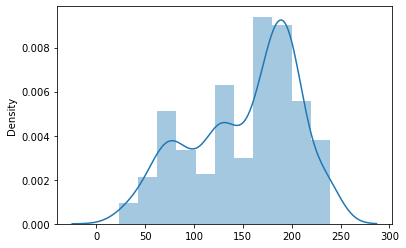

In [228]:
# demand plot 
# market OJK ZSF
df3 = df2.copy()
df3 = df3.loc[(df3['BOARD_POINT'] == 'OJK') & (df3['OFF_POINT'] == 'ZSF')]
df3 = df3.loc[df3.index.repeat(df3['NET_BOOKING'])]
sns.distplot(x = df3['DAYS_GAP'])
df3.head(30)

<IPython.core.display.Javascript object>

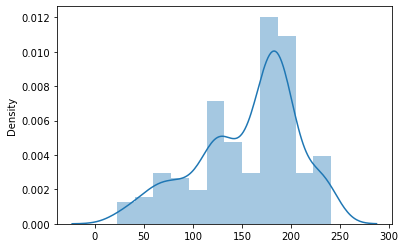

In [229]:
# market ZSF OJK
df3 = df2.copy()
df3 = df3.loc[(df3['BOARD_POINT'] == 'ZSF') & (df3['OFF_POINT'] == 'OJK')]
df3 = df3.loc[df3.index.repeat(df3['NET_BOOKING'])]
sns.distplot(x = df3['DAYS_GAP'])

<IPython.core.display.Javascript object>

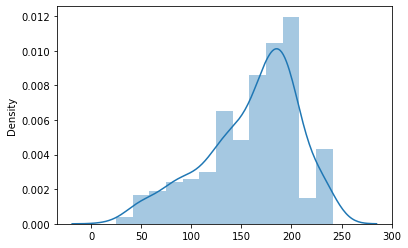

In [230]:
# market ZSF KUF
df3 = df2.copy()
df3 = df3.loc[(df3['BOARD_POINT'] == 'ZSF') & (df3['OFF_POINT'] == 'KUF')]
df3 = df3.loc[df3.index.repeat(df3['NET_BOOKING'])]
sns.distplot(x = df3['DAYS_GAP'])

In [231]:
# netbooking float to int
df2['NET_BOOKING'] = df2['NET_BOOKING'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1445
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FLIGHT_DATE          1446 non-null   datetime64[ns]
 1   FLIGHT_NUMBER        1446 non-null   object        
 2   BOARD_POINT          1446 non-null   object        
 3   OFF_POINT            1446 non-null   object        
 4   CREATION_DATE_TIME   1446 non-null   datetime64[ns]
 5   FARE_LEVEL_CODE      1446 non-null   object        
 6   FARE_BASIS           1446 non-null   object        
 7   TOTAL_BOOKING        1446 non-null   int64         
 8   TOTAL_CANCELLED      1446 non-null   float64       
 9   NET_BOOKING          1446 non-null   int32         
 10  DAYS_GAP             1446 non-null   float64       
 11  FLIGHT_DAY_OF_WEEK   1446 non-null   int64         
 12  FLIGHT_MONTH         1446 non-null   int64         
 13  FLIGHT_YEAR          1446 non-nul

In [232]:
# total_sold
def total_sold_till_date(series):
    total_sold = []
    sold = 0
    total_sold.append(sold)
    for i in series:
        sold = sold+i
        total_sold.append(sold)
    return pd.Series(total_sold[:-1])

df2['TOTAL_SOLD'] = df2.groupby(['FLIGHT_DATE','FLIGHT_NUMBER'])['NET_BOOKING'].transform(total_sold_till_date)
df2.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,FLIGHT_DATE,FLIGHT_NUMBER,BOARD_POINT,OFF_POINT,CREATION_DATE_TIME,FARE_LEVEL_CODE,FARE_BASIS,TOTAL_BOOKING,TOTAL_CANCELLED,NET_BOOKING,DAYS_GAP,FLIGHT_DAY_OF_WEEK,FLIGHT_MONTH,FLIGHT_YEAR,BOOKING_DAY_OF_WEEK,BOOKING_MONTH,BOOKING_YEAR,TOTAL_SOLD
0,2020-05-21,FL133,ZSF,OJK,2020-02-14 15:36:00,WO,WO45S,2,2.0,0,96.0,3,5,2020,4,2,2020,0
1,2020-05-21,FL133,ZSF,OJK,2020-02-22 11:23:00,WO,WO45S,1,1.0,0,88.0,3,5,2020,5,2,2020,0
2,2020-05-21,FL133,ZSF,OJK,2020-02-23 10:38:00,WO,WO45S,1,1.0,0,87.0,3,5,2020,6,2,2020,0
3,2020-05-21,FL133,ZSF,OJK,2020-02-29 14:16:00,BD,BDS,2,2.0,0,81.0,3,5,2020,5,2,2020,0
4,2020-05-21,FL133,ZSF,OJK,2020-03-05 20:49:00,WO,WO45S,1,1.0,0,76.0,3,5,2020,3,3,2020,0


In [233]:
# Filtering unwanted columns
df2.drop(['FLIGHT_DATE','CREATION_DATE_TIME','FARE_BASIS','TOTAL_BOOKING','TOTAL_BOOKING',
          'TOTAL_CANCELLED','NET_BOOKING'],axis = 1,inplace =  True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1445
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FLIGHT_NUMBER        1446 non-null   object 
 1   BOARD_POINT          1446 non-null   object 
 2   OFF_POINT            1446 non-null   object 
 3   FARE_LEVEL_CODE      1446 non-null   object 
 4   DAYS_GAP             1446 non-null   float64
 5   FLIGHT_DAY_OF_WEEK   1446 non-null   int64  
 6   FLIGHT_MONTH         1446 non-null   int64  
 7   FLIGHT_YEAR          1446 non-null   int64  
 8   BOOKING_DAY_OF_WEEK  1446 non-null   int64  
 9   BOOKING_MONTH        1446 non-null   int64  
 10  BOOKING_YEAR         1446 non-null   int64  
 11  TOTAL_SOLD           1446 non-null   int32  
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 141.2+ KB


In [234]:
# Splitting & Encoding 
Y = df2['TOTAL_SOLD']
X = df2.drop(['TOTAL_SOLD'],axis = 1)
X_train,X_test , y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 13)
print(X.shape,Y.shape)

<IPython.core.display.Javascript object>

(1446, 11) (1446,)


In [235]:
"""from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

colTrans = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,2,3])], remainder = 'passthrough')
scaler = StandardScaler()

X_train_en = colTrans.fit_transform(X_train)
X_train = scaler.fit_transform(X_train_en)

X_test_en = colTrans.transform(X_test)
X_test = scaler.transform(X_test_en)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)"""

"from sklearn.preprocessing import OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\n\ncolTrans = ColumnTransformer([('encoder',OneHotEncoder(),[0,1,2,3])], remainder = 'passthrough')\nscaler = StandardScaler()\n\nX_train_en = colTrans.fit_transform(X_train)\nX_train = scaler.fit_transform(X_train_en)\n\nX_test_en = colTrans.transform(X_test)\nX_test = scaler.transform(X_test_en)\n\nprint(X_train.shape,X_test.shape,y_train.shape,y_test.shape)"

In [236]:
#model1 = xgb.XGBRegressor().fit(X_train,y_train)

In [237]:
from catboost import CatBoostRegressor

params = {'learning_rate' : 0.001,
          'cat_features':[0,1,2,3],# need to be handled or encoded
          'verbose':200,
          'random_seed':13}
model1 = CatBoostRegressor(**params).fit(X_train,y_train,eval_set = (X_test,y_test),use_best_model = True)

0:	learn: 7.3429521	test: 6.3685182	best: 6.3685182 (0)	total: 38.5ms	remaining: 38.4s
200:	learn: 6.9759596	test: 6.0248271	best: 6.0248271 (200)	total: 3.94s	remaining: 15.7s
400:	learn: 6.6754854	test: 5.7588413	best: 5.7588413 (400)	total: 7.97s	remaining: 11.9s
600:	learn: 6.4322217	test: 5.5599469	best: 5.5599469 (600)	total: 11.7s	remaining: 7.75s
800:	learn: 6.2290577	test: 5.4073093	best: 5.4073093 (800)	total: 15.3s	remaining: 3.8s
999:	learn: 6.0515774	test: 5.2813415	best: 5.2813415 (999)	total: 19.1s	remaining: 0us

bestTest = 5.281341484
bestIteration = 999



In [238]:
metrics.r2_score(y_test,model1.predict(X_test))

<IPython.core.display.Javascript object>

0.30312824785764636

In [239]:
metrics.r2_score(y_train,model1.predict(X_train))

<IPython.core.display.Javascript object>

0.31372844475245454

In [240]:
metrics.mean_squared_error(y_test,model1.predict(X_test))

<IPython.core.display.Javascript object>

27.892567875681706

In [241]:
metrics.mean_squared_error(y_train,model1.predict(X_train))

<IPython.core.display.Javascript object>

37.01825356765051

In [242]:
model1.predict(X_train)
max(model1.predict(X_train))

13.856033957678697

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Feature Importance')

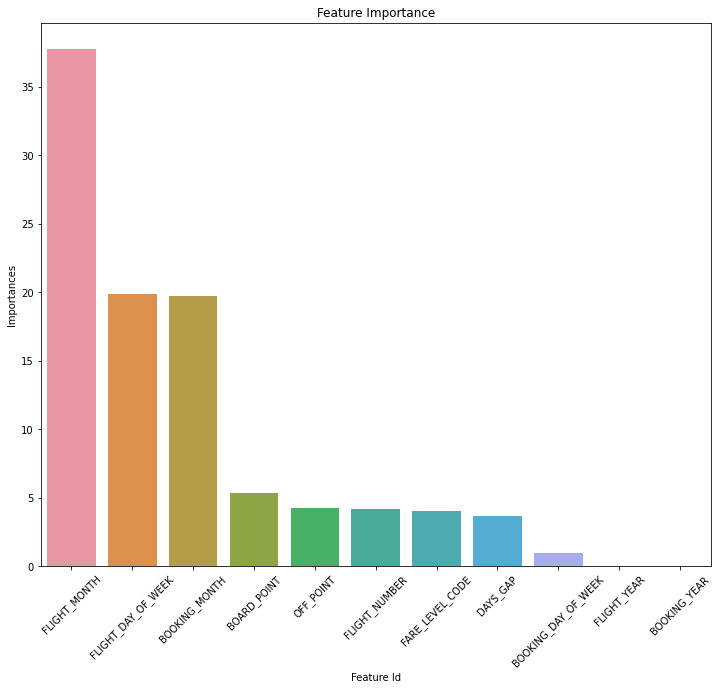

In [243]:
feature_imp = model1.get_feature_importance(prettified = True)

plt.figure(figsize = (12,10))
sns.barplot(data = feature_imp, x = 'Feature Id', y = 'Importances')
plt.xticks(rotation = 45)
plt.title('Feature Importance')

In [244]:
# dumping models 
import joblib
joblib.dump(model1,"models/CatBoostRegressor.pkl")

['models/CatBoostRegressor.pkl']

In [245]:
# pipeline for xgboost
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

column_transform = ColumnTransformer([("one_hot",OneHotEncoder(),[0,1,2,3])],remainder = "passthrough")
scaler = StandardScaler()
model2 = xgb.XGBRegressor(learning_rate=0.001,max_depth=5,cv = 5,metrics={'mae'},
    early_stopping_rounds=10,random_state=0,n_estimators=1000)

pipe = Pipeline([('step1',column_transform),
                ('step2',scaler),
                ('step3',model2)])

pipe.fit(X_train,y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[21:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "cv", "early_stopping_rounds", "metrics" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  [0, 1, 2, 3])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, cv=5,
                              early_stopping_rounds=10, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='', learning_rate=0.001,
                              max_delta_step=0, max_depth=5, metrics={'mae'},
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=1000,
                              n_jobs=8, num_parallel_tree=1, random_state=0,
   

In [246]:
# train predict
pred_data = pipe.predict(X_train)
max(pred_data)

18.058369

In [247]:
# test predict
pred_data_test = pipe.predict(X_test)
max(pred_data_test)

18.058369

In [248]:
# metrics 
metrics.r2_score(y_test,pipe.predict(X_test))

<IPython.core.display.Javascript object>

0.3975241119445536

In [249]:
metrics.r2_score(y_train,pipe.predict(X_train))

<IPython.core.display.Javascript object>

0.3836657347792043

In [250]:
metrics.mean_squared_error(y_test,pipe.predict(X_test))

<IPython.core.display.Javascript object>

24.11433603010413

In [251]:
metrics.mean_squared_error(y_train,pipe.predict(X_train))

<IPython.core.display.Javascript object>

33.24575809374052

In [252]:
# dumping models 
import joblib
joblib.dump(model1,"models/XGBoostRegressor.pkl")

['models/XGBoostRegressor.pkl']